## Random Forest

References
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.datacamp.com/community/tutorials/random-forests-classifier-python

TODO
- test on the provided test data
- XGBoost

In [1]:
import pandas as pd

data = pd.read_csv('TrainOnMe.csv')

# remove noisy entries
data = data.drop(data[(data.y != 'Atsuto') &
                      (data.y != 'Bob') &
                      (data.y != 'Jörg')].index)
data = data.drop(data[data.id == '880'].index)
print(data.y.value_counts())

data = data.drop(columns='id')
data[['x1','x2','x3','x4','x7','x8','x9','x10']] = data[['x1','x2','x3','x4','x7','x8','x9','x10']].apply(pd.to_numeric)
data.head(5)

Bob       519
Atsuto    296
Jörg      184
Name: y, dtype: int64


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,Bob,-0.78103,-0.63375,-0.03665,0.27517,False,F,-1.85755,0.22668,-2.35130,1.42092
1,Bob,0.42649,-0.50019,0.00696,0.11817,False,F,-1.73761,-1.61015,-5.12219,1.87723
2,Atsuto,1.86817,-0.45565,0.07658,0.09662,False,F,1.02798,-0.92326,-1.67111,2.07828
3,Atsuto,-1.80073,0.08535,-0.02467,0.14032,False,F,2.02793,-0.46318,2.41329,-0.62963
4,Bob,1.56943,-1.25860,-0.02092,0.22267,False,F,-0.43304,-1.99881,-1.58241,2.28423


In [ ]:
print(data.dtypes)

In [2]:
#TODO: remove outliers
data = data.drop(data[(data.x7 < -100) | (data.x7 > 100)].index)
data = data.drop(data[(data.x8 < -100) | (data.x8 > 100)].index)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

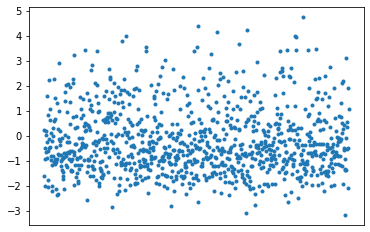

In [5]:
y = (data.loc[:,['x8']]).to_numpy().flatten()
plt.plot(y,'.')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()

In [ ]:
print(f"shape of the data: {data.shape}\n")
print("x5 unique and count: ")
print(data.x5.value_counts())
print('\n')
print("x6 unique and count: ")
print(data.x6.value_counts())

In [6]:
unique_x5 = ['True', 'False']
data = data[data['x5'].isin(unique_x5)]
unique_x6 = ['F', 'A', 'Fx', 'C', 'E', 'B', 'D']

print(f"shape of the data: {data.shape}\n")
print("x5 unique and count: ")
print(data.x5.value_counts())
print('\n')
print("x6 unique and count: ")
print(data.x6.value_counts())

shape of the data: (995, 11)

x5 unique and count: 
False    683
True     312
Name: x5, dtype: int64


x6 unique and count: 
F     615
A     228
Fx     35
C      33
E      29
B      28
D      27
Name: x6, dtype: int64


In [33]:
label_dict = {'Atsuto': 0, 'Bob': 1, 'Jörg':2}
labels = data['y'].replace(label_dict)
print(labels)
print(labels.isnull().values.any())

0       1
1       1
2       0
3       0
4       1
       ..
996     0
997     1
998     2
999     0
1000    2
Name: y, Length: 995, dtype: int64
False


In [37]:
# one-hot encoding
features = pd.get_dummies(data.drop(columns='y'))
features = features.fillna(0)
print(features.isnull().values.any())

print(f"shape of the data: {features.shape}\n")
features.head(5)

False
shape of the data: (995, 17)



,x1,x2,x3,x4,x7,x8,x9,x10,x5_False,x5_True,x6_A,x6_B,x6_C,x6_D,x6_E,x6_F,x6_Fx
0,-0.78103,-0.63375,-0.03665,0.27517,-1.85755,0.22668,-2.35130,1.42092,1,0,0,0,0,0,0,1,0
1,0.42649,-0.50019,0.00696,0.11817,-1.73761,-1.61015,-5.12219,1.87723,1,0,0,0,0,0,0,1,0
2,1.86817,-0.45565,0.07658,0.09662,1.02798,-0.92326,-1.67111,2.07828,1,0,0,0,0,0,0,1,0
3,-1.80073,0.08535,-0.02467,0.14032,2.02793,-0.46318,2.41329,-0.62963,1,0,0,0,0,0,0,1,0
4,1.56943,-1.25860,-0.02092,0.22267,-0.43304,-1.99881,-1.58241,2.28423,1,0,0,0,0,0,0,1,0


In [38]:
import numpy as np

labels = np.array(labels)
features_names = list(features.columns)
features = np.array(features)

print(f"training features shape: {features.shape}")
print(f"# training labels: {labels.shape}")

training features shape: (995, 17)
# training labels: (995,)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25)

In [41]:
print(x_train.shape)

np.where(np.isnan(x_train))

(746, 17)


(array([], dtype=int64), array([], dtype=int64))

In [42]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [43]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8152610441767069
